In [1]:
from z3 import *
import numpy as np
import random
import arviz as az
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True # to for tight_layout()

import os, sys
sys.path.append(os.path.join("../../../"))

# our library
from src.mcmc_sat import smt, mcmc, utils

In [2]:
# We create five Integer variables
num_vars = 5*2
x = [Int(f'x{i}') for i in range(num_vars)] # (age, sex)

s = Solver() # get an instance of a Z3 solver

# model constraints
s.add(0<=x[0])
s.add(x[0]<=x[1])
s.add(x[1]<=x[2])
s.add(x[2]==30) #  median
s.add(x[2]<=x[3])
s.add(x[3]<=x[4])
s.add(x[4]<=125)

s.add(x[0] + x[1] + x[2] + x[3] + x[4] == 38*5) #average

for i in range(5,10):
    s.add(0<=x[i])
    s.add(x[i]<=1)

s.add(x[5] + x[6] + x[7] + x[8] + x[9] == 3) # only 3 males

s.add(x[0]*x[5] + x[1]*x[6] + x[2]*x[7] + x[3]*x[8] + x[4]*x[9] == 44*3) # average age of males


In [3]:
trace = mcmc.sample_mh_trace_from_z3_model(backend='megasampler',
                                           z3_problem=s,
                                           timeout_sampler=60*10)

Parsing input file: megasampler_input/z3_problem.smt2
Number of formulas in file: 20
-------------FORMULA STATISTICS-------------
Arrays 0
Bit-vectors 0
Bools 0
Bits 0
Uninterpreted functions 0
Ints 10
Reals 0
Formula tree depth 6
--------------------------------------------
starting MeGASampler
Formula is satisfiable
MAX-SMT returned 'unknown' (timeout?)
Stopping: timeout
---------SOLVING STATISTICS--------
do_epoch time: 401.6
epoch time: 599.928
grow_seed time: 17.4202
initial_solving time: 0.0193506
output time: 0.93534
start_epoch time: 198.235
total time: 600.009
Epochs: 68803
MAX-SMT calls: 68804
SMT calls: 1
Assignments considered (with repetitions): 7017805
Models (with repetitions): 7017804
Unique models (# samples in file): 453
-----------------------------------
The parameter `solver_samples` only contains 453 samples. Thus, every chain will contain 453 instead of 453. Try running the SAT/SMT sampler longer to obtain more samples.



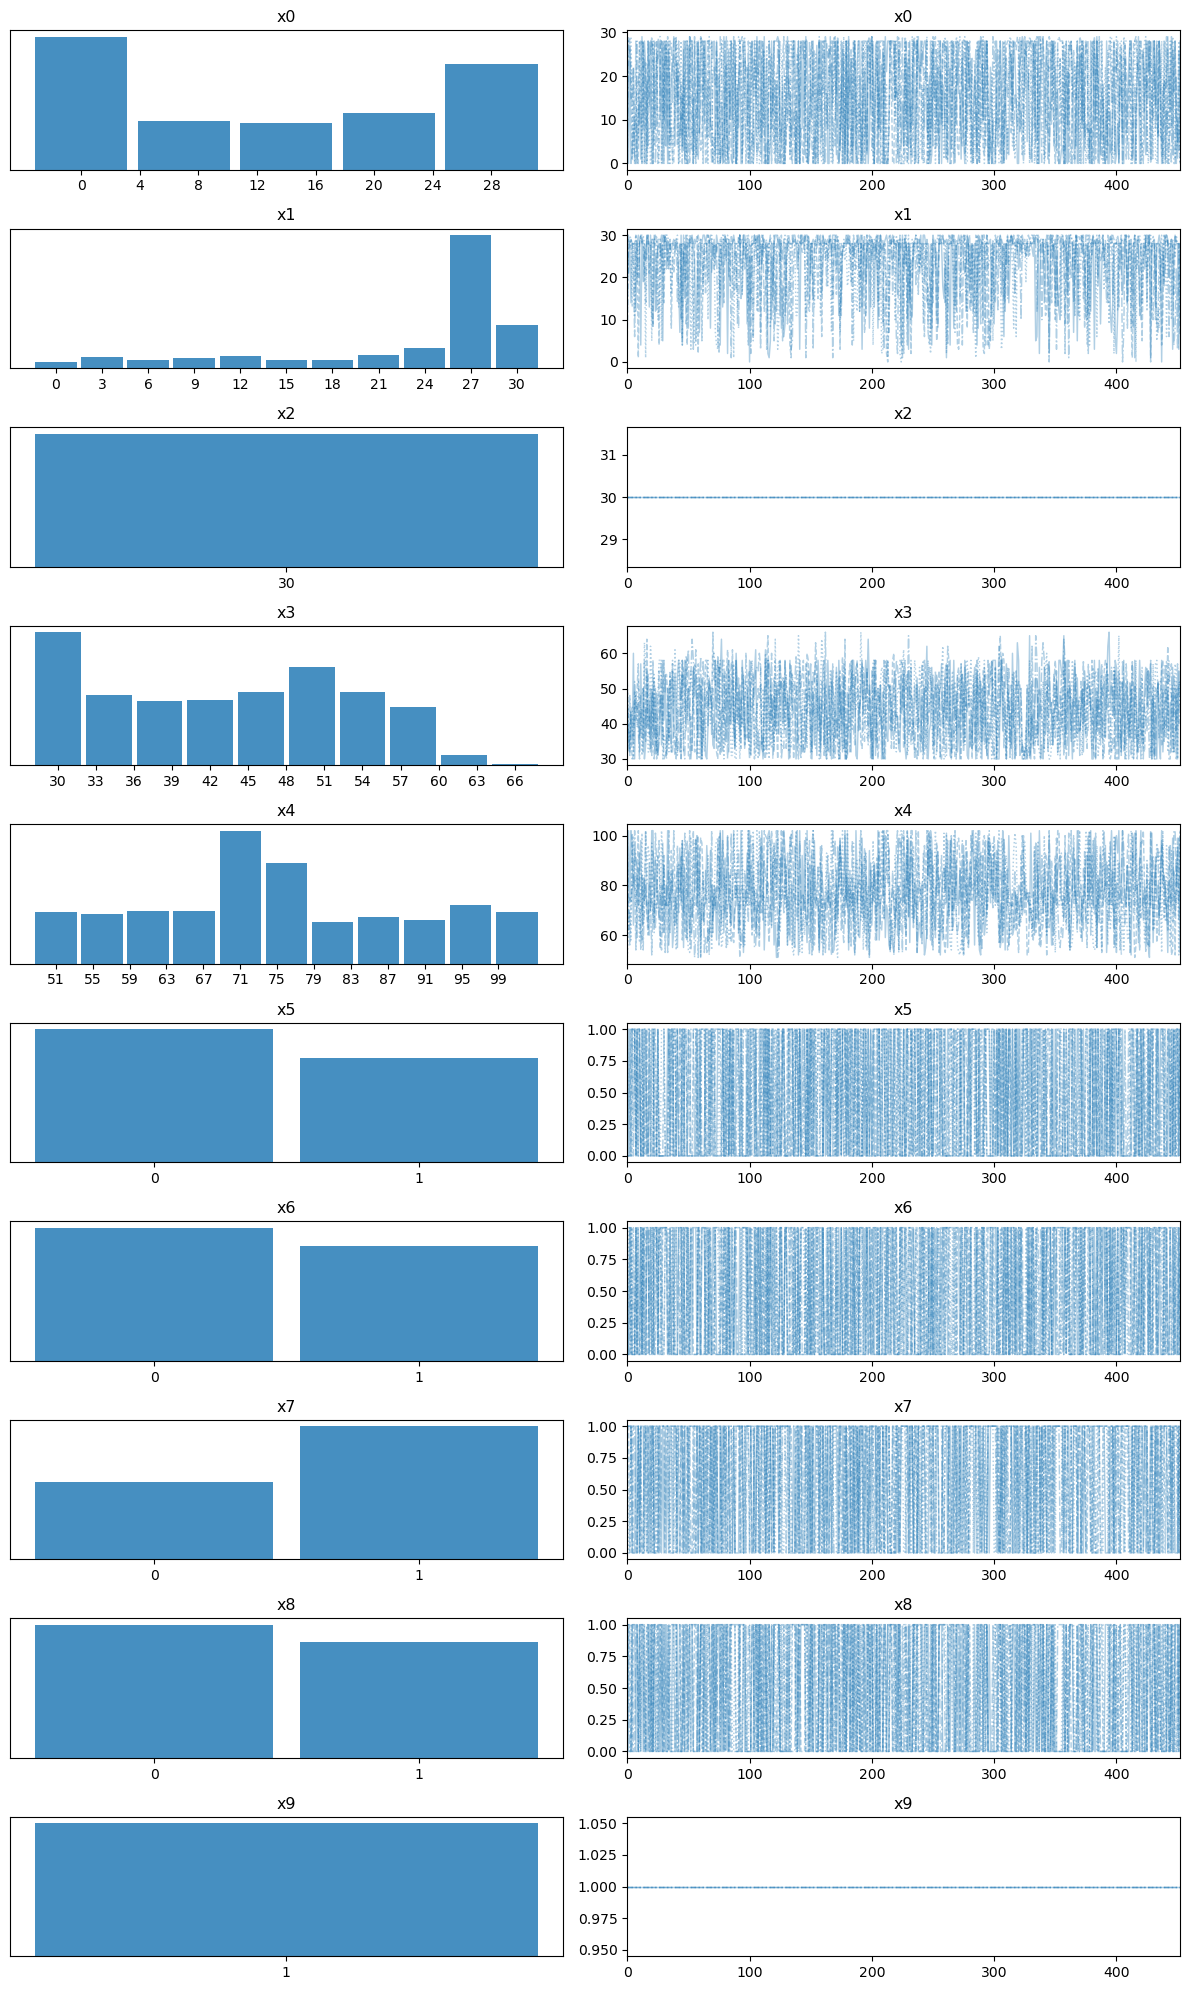

In [4]:
# Plot the posterior
az.plot_trace(trace);
plt.savefig('megasampler_trace_plot.png', dpi=150);

In [5]:
# Diagnostics
az.summary(trace)

/home/pardo/programs/miniconda3/envs/mcmc_sat/lib/python3.12/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc_sat/lib/python3.12/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x0,14.819,11.324,0.0,28.0,0.260,0.184,1889.0,1763.0,1.0
x1,23.647,8.195,5.0,30.0,0.197,0.139,1757.0,1636.0,1.0
x2,30.000,0.000,30.0,30.0,0.000,0.000,1808.0,1808.0,NaN
x3,44.313,9.724,30.0,58.0,0.227,0.161,1796.0,1694.0,1.0
x4,77.221,14.358,55.0,102.0,0.347,0.245,1692.0,1655.0,1.0
x5,0.439,0.496,0.0,1.0,0.012,0.008,1784.0,1784.0,1.0
x6,0.464,0.499,0.0,1.0,0.012,0.009,1699.0,1699.0,1.0
x7,0.631,0.483,0.0,1.0,0.012,0.008,1690.0,1690.0,1.0
x8,0.466,0.499,0.0,1.0,0.012,0.009,1669.0,1669.0,1.0
x9,1.000,0.000,1.0,1.0,0.000,0.000,1808.0,1808.0,NaN


In [6]:
utils.save_trace(trace, f'db_cacm_SMT_{num_vars}.nc')